<a href="https://colab.research.google.com/github/svgoudar/My-Data-Science-Roadmap/blob/main/EDA/3.Handling%20Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
data = load_iris()


df = pd.DataFrame(data.data, columns=data.feature_names)



In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load iris dataset
df = sns.load_dataset('iris')

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load iris dataset
df = sns.load_dataset('iris')

# Use only numeric columns
numeric_df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]


In [15]:
numeric_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Z-scores
z_scores = np.abs(scaled_data)
outliers_z = (z_scores > 3).any(axis=1)

# View outliers
df[outliers_z]


,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa


In [17]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso_forest.fit_predict(numeric_df)

# -1 is outlier, 1 is inlier
df['outlier'] = outlier_pred
outliers_iforest = df[df['outlier'] == -1]

print("Outliers detected by Isolation Forest:")
print(outliers_iforest.head())


Outliers detected by Isolation Forest:
     sepal_length  sepal_width  petal_length  petal_width    species  outlier
13            4.3          3.0           1.1          0.1     setosa       -1
14            5.8          4.0           1.2          0.2     setosa       -1
15            5.7          4.4           1.5          0.4     setosa       -1
41            4.5          2.3           1.3          0.3     setosa       -1
109           7.2          3.6           6.1          2.5  virginica       -1


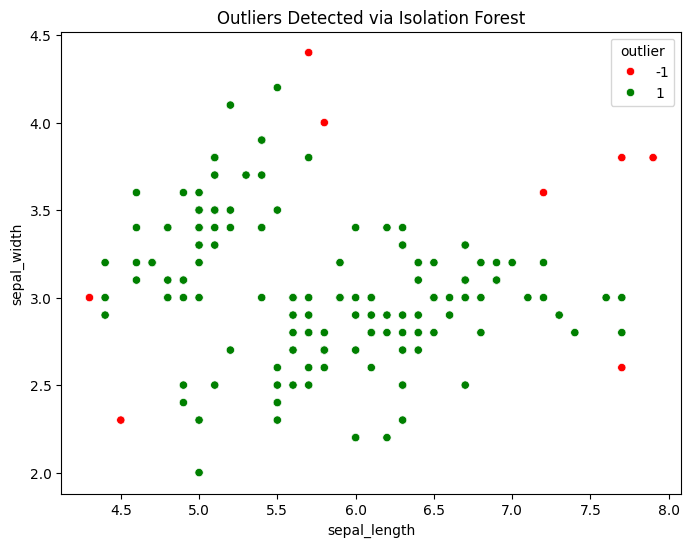

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='outlier', palette={1: 'green', -1: 'red'})
plt.title('Outliers Detected via Isolation Forest')
plt.show()


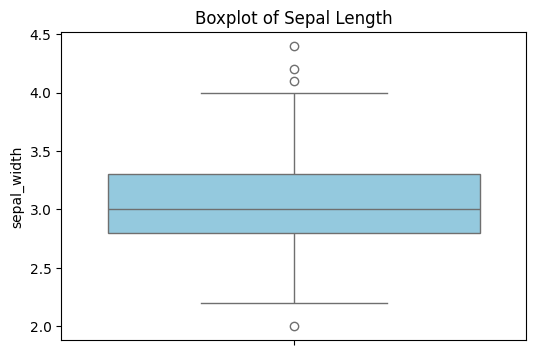

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the iris dataset
df = sns.load_dataset('iris')

# Boxplot for Sepal Length
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['sepal_width'], color='skyblue')
plt.title('Boxplot of Sepal Length')
plt.show()


In [25]:
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get outlier rows
outliers = df[(df['sepal_width'] < lower_bound) | (df['sepal_width'] > upper_bound)]
print(outliers)


    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor


## What is Noise??

| Aspect       | Outlier                                                                     | Noise                                                                              |
| ------------ | --------------------------------------------------------------------------- | ---------------------------------------------------------------------------------- |
| **Meaning**  | A data point that deviates significantly from others but **could be valid** | Random error or disturbance in data that **does not carry meaningful information** |
| **Examples** | A very tall person in a dataset of average-height people                    | Random typo, sensor glitch, or transmission error                                  |
| **Signal**   | Could indicate an **important pattern**, fraud, rare event, etc.            | Generally considered **irrelevant** or **accidental**                              |


| Criteria                 | Outlier                                     | Noise                                    |
| ------------------------ | ------------------------------------------- | ---------------------------------------- |
| **Repeatability**        | Might repeat in similar contexts            | Purely random and not repeatable         |
| **Pattern or Meaning**   | Could have business significance            | No meaningful pattern                    |
| **Detection Techniques** | Statistical tests, isolation forest, etc.   | Often removed via smoothing or filtering |
| **Treatment**            | May be kept, flagged, or modeled separately | Often **removed or corrected**           |
